In [ ]:
#Imports
import torch
import torchvision
from torchvision.datasets import MNIST

In [ ]:
#Download training dataset
dataset = MNIST(root='data/', download=True)

100%|██████████| 9912422/9912422 [00:00<00:00, 127263105.64it/s]

Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw


100%|██████████| 28881/28881 [00:00<00:00, 75286323.07it/s]


Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 33655610.48it/s]


Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 3254275.50it/s]


Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw



In [ ]:
len(dataset)

60000

In [ ]:
test_dataset = MNIST(root='data/', train=False)
len(test_dataset)

10000

In [ ]:
dataset[0]

(<PIL.Image.Image image mode=L size=28x28 at 0x7FD984C2C100>, 5)

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

Lable: 5


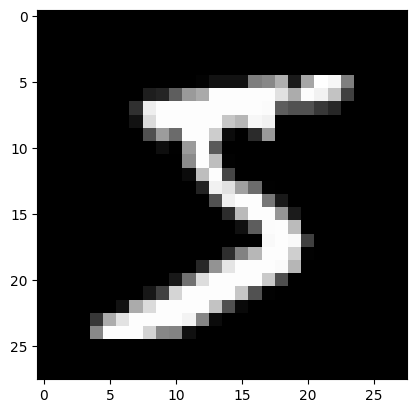

In [ ]:
image, label = dataset[0]
plt.imshow(image, cmap='gray')
print('Lable:', label)

Lable: 1


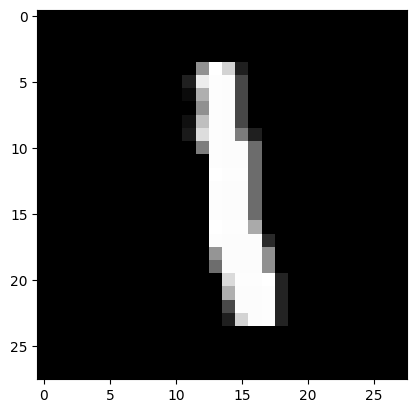

In [ ]:
image, label = dataset[6]
plt.imshow(image, cmap='gray')
print('Lable:', label)

In [ ]:
import  torchvision.transforms as transforms

In [ ]:
# MNIST dataset (images and labels)
dataset = MNIST(root='data/',
                train=True,
                transform = transforms.ToTensor())

In [ ]:
img_tensor, label = dataset[0]
print(img_tensor.shape, label)

torch.Size([1, 28, 28]) 5


In [ ]:
print(img_tensor[0, 10:15, 10:15])
print(torch.max(img_tensor), torch.min(img_tensor))

tensor([[0.0039, 0.6039, 0.9922, 0.3529, 0.0000],
        [0.0000, 0.5451, 0.9922, 0.7451, 0.0078],
        [0.0000, 0.0431, 0.7451, 0.9922, 0.2745],
        [0.0000, 0.0000, 0.1373, 0.9451, 0.8824],
        [0.0000, 0.0000, 0.0000, 0.3176, 0.9412]])
tensor(1.) tensor(0.)


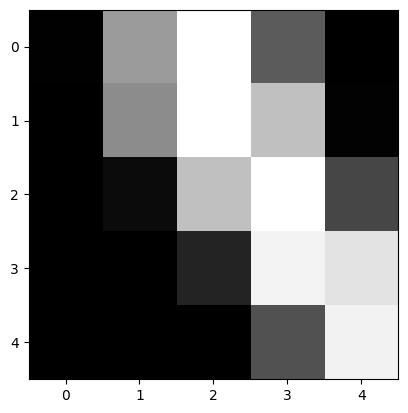

In [ ]:
#plot the image by passing in the 28x28 matrix
plt.imshow(img_tensor[0, 10:15, 10:15], cmap = 'gray')

In [ ]:
from torch.utils.data import random_split

train_ds, val_ds = random_split(dataset, [50000, 10000])
len(train_ds), len(val_ds)

(50000, 10000)

In [ ]:
from torch.utils.data import DataLoader

batch_size = 128

train_loader = DataLoader(train_ds, batch_size, shuffle=True)
val_loader = DataLoader(val_ds, batch_size)

In [ ]:
import torch.nn as nn

input_size = 28*28
num_classes = 10

#Logistic regression model
model = nn.Linear(input_size, num_classes)

In [ ]:
print(model.weight.shape)
model.weight

torch.Size([10, 784])


Parameter containing:
tensor([[-0.0024,  0.0029,  0.0236,  ...,  0.0156, -0.0275,  0.0180],
        [ 0.0315, -0.0268, -0.0325,  ..., -0.0327, -0.0067, -0.0221],
        [ 0.0107, -0.0033, -0.0296,  ...,  0.0156,  0.0093, -0.0090],
        ...,
        [-0.0244,  0.0317, -0.0272,  ..., -0.0126, -0.0247,  0.0025],
        [-0.0046,  0.0206, -0.0213,  ...,  0.0016, -0.0079,  0.0249],
        [ 0.0288,  0.0246,  0.0040,  ...,  0.0354, -0.0227, -0.0193]],
       requires_grad=True)

In [ ]:
print(model.bias.shape)
model.bias

torch.Size([10])


Parameter containing:
tensor([-0.0175,  0.0266,  0.0342, -0.0341,  0.0303, -0.0259,  0.0096, -0.0280,
         0.0206, -0.0306], requires_grad=True)

In [ ]:
for images, labels in train_loader:
  print(labels)
  print(images.shape)
  break

tensor([0, 9, 4, 2, 6, 9, 0, 6, 6, 0, 2, 7, 4, 7, 1, 9, 5, 4, 9, 7, 1, 8, 7, 6,
        1, 8, 5, 8, 1, 6, 1, 4, 3, 0, 5, 9, 9, 0, 7, 5, 4, 4, 1, 2, 2, 4, 3, 4,
        3, 9, 6, 6, 7, 4, 6, 5, 8, 6, 4, 8, 8, 2, 7, 3, 9, 6, 7, 5, 9, 7, 2, 4,
        4, 5, 4, 0, 2, 7, 0, 9, 3, 5, 1, 1, 4, 1, 1, 3, 7, 4, 4, 8, 1, 6, 2, 2,
        6, 1, 2, 2, 1, 7, 0, 8, 9, 6, 1, 3, 6, 6, 5, 2, 5, 4, 7, 1, 3, 1, 3, 9,
        1, 8, 8, 6, 6, 4, 6, 2])
torch.Size([128, 1, 28, 28])


In [ ]:
images.shape

torch.Size([128, 1, 28, 28])

In [ ]:
images.reshape(128, 784)

tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])

In [ ]:
class Person:
  #Class constructor
  def __init__(self, name , age):
    #Objest properties
    self.name = name
    self.age = age

  #Method
  def say_hello(self):
    print("Hello my name is "+ self.name +"!")

In [ ]:
bob = Person("Bob", 32)

In [ ]:
bob.say_hello()

Hello my name is Bob!


In [ ]:
class MnistModel(nn.Module):
  def __init__ (self):
    super().__init__()
    self.linear = nn.Linear(input_size, num_classes)

  def forward(self, xb):
    xb = xb.reshape(-1, 784)
    out = self.linear(xb)
    return out

model = MnistModel()

In [ ]:
model.linear

Linear(in_features=784, out_features=10, bias=True)

In [ ]:
print(model.linear.weight.shape, model.linear.bias.shape)
list(model.parameters())

torch.Size([10, 784]) torch.Size([10])


[Parameter containing:
 tensor([[ 0.0098,  0.0020, -0.0004,  ..., -0.0085, -0.0285,  0.0304],
         [ 0.0039,  0.0107,  0.0020,  ...,  0.0035,  0.0127, -0.0160],
         [ 0.0201, -0.0077,  0.0178,  ...,  0.0120,  0.0151,  0.0010],
         ...,
         [ 0.0172, -0.0122, -0.0056,  ...,  0.0013,  0.0169,  0.0106],
         [ 0.0326,  0.0331,  0.0068,  ..., -0.0054,  0.0175,  0.0289],
         [ 0.0261,  0.0274,  0.0278,  ..., -0.0332, -0.0101,  0.0328]],
        requires_grad=True),
 Parameter containing:
 tensor([ 0.0086, -0.0200, -0.0137, -0.0137, -0.0204, -0.0271, -0.0061, -0.0243,
         -0.0270, -0.0218], requires_grad=True)]

In [ ]:
for images , labels in train_loader:
  print(images.shape)
  outputs = model(images)
  break

print('outputs.shape:', outputs.shape)
print('sample outputs:\n', outputs[:2].data)

torch.Size([128, 1, 28, 28])
outputs.shape: torch.Size([128, 10])
sample outputs:
 tensor([[-0.3236, -0.4195, -0.1899,  0.1270,  0.0614, -0.1799, -0.0948,  0.5160,
          0.4529,  0.3729],
        [-0.1693, -0.3511,  0.0193, -0.1667,  0.0126, -0.0734, -0.1735,  0.2168,
          0.1648,  0.2093]])


In [ ]:
import torch.nn.functional as F

In [ ]:
#Apply softmax for each output row
probs = F.softmax(outputs, dim=1)

#Look at sample probabilities
print("Sample probablities:\n", probs[:2].data)

#Add up the probabilities of an output row
print("Sum", torch.sum(probs[0]).item())

Sample probablities:
 tensor([[0.0667, 0.0606, 0.0762, 0.1046, 0.0980, 0.0770, 0.0838, 0.1544, 0.1449,
         0.1338],
        [0.0857, 0.0715, 0.1035, 0.0859, 0.1028, 0.0943, 0.0853, 0.1261, 0.1197,
         0.1251]])
Sum 0.9999998807907104


In [ ]:
max_probs, preds = torch.max(probs, dim=1)
print(preds)
print(max_probs)

tensor([7, 7, 7, 8, 3, 7, 9, 9, 8, 4, 7, 9, 2, 7, 7, 4, 4, 9, 4, 9, 2, 7, 8, 9,
        9, 5, 3, 2, 4, 0, 9, 9, 5, 4, 2, 0, 7, 9, 9, 7, 7, 7, 8, 7, 9, 9, 8, 9,
        9, 8, 9, 9, 9, 9, 7, 9, 9, 3, 8, 7, 7, 9, 9, 8, 7, 7, 9, 9, 9, 7, 7, 8,
        2, 8, 9, 9, 9, 3, 7, 9, 7, 9, 2, 2, 8, 7, 2, 2, 9, 9, 8, 9, 7, 3, 9, 2,
        9, 9, 9, 4, 9, 9, 4, 9, 0, 2, 9, 8, 9, 2, 7, 7, 2, 2, 2, 9, 3, 3, 8, 7,
        9, 7, 3, 9, 7, 9, 9, 7])
tensor([0.1544, 0.1261, 0.1173, 0.1422, 0.1386, 0.1354, 0.1273, 0.1475, 0.1198,
        0.1336, 0.1477, 0.1415, 0.1286, 0.1369, 0.1421, 0.1388, 0.1344, 0.1233,
        0.1409, 0.1385, 0.1166, 0.1436, 0.1282, 0.1289, 0.1341, 0.1254, 0.1438,
        0.1248, 0.1610, 0.1250, 0.1264, 0.1441, 0.1162, 0.1208, 0.1283, 0.1156,
        0.1585, 0.1193, 0.1359, 0.1282, 0.1291, 0.1353, 0.1582, 0.1393, 0.1332,
        0.1530, 0.1188, 0.1475, 0.1325, 0.1243, 0.1329, 0.1527, 0.1181, 0.1344,
        0.1284, 0.1407, 0.1210, 0.1551, 0.1361, 0.1637, 0.1732, 0.1360, 0.1131,
       

In [ ]:
 labels

tensor([0, 8, 4, 7, 0, 1, 4, 7, 6, 9, 6, 4, 1, 5, 2, 4, 9, 7, 9, 7, 1, 2, 5, 5,
        3, 7, 0, 1, 9, 3, 5, 8, 7, 7, 1, 4, 8, 7, 9, 6, 2, 3, 0, 6, 7, 9, 1, 7,
        2, 6, 9, 9, 9, 3, 6, 2, 4, 0, 2, 0, 0, 7, 1, 1, 5, 6, 3, 2, 8, 3, 0, 4,
        1, 0, 4, 8, 2, 0, 3, 9, 2, 9, 1, 1, 4, 0, 8, 1, 5, 8, 3, 9, 8, 8, 9, 1,
        9, 9, 0, 8, 7, 9, 0, 8, 1, 3, 9, 7, 1, 3, 5, 5, 6, 2, 1, 9, 6, 5, 4, 2,
        3, 5, 4, 7, 5, 9, 5, 8])

In [ ]:
def accuracy(outputs, labels):
  _, preds = torch.max(outputs, dim=1)
  return torch.tensor(torch.sum(preds == labels).item()/ len(preds))

In [ ]:
accuracy(outputs, labels)

tensor(0.1328)

In [ ]:
outputs

tensor([[-0.3236, -0.4195, -0.1899,  ...,  0.5160,  0.4529,  0.3729],
        [-0.1693, -0.3511,  0.0193,  ...,  0.2168,  0.1648,  0.2093],
        [ 0.1995, -0.0464, -0.0479,  ...,  0.2367,  0.2240,  0.2136],
        ...,
        [ 0.1277, -0.4157,  0.1290,  ..., -0.0052,  0.1336,  0.2896],
        [-0.1245, -0.1497, -0.2825,  ...,  0.0451, -0.1730,  0.0477],
        [-0.1204, -0.4466,  0.0528,  ...,  0.1410, -0.0380,  0.0824]],
       grad_fn=<AddmmBackward0>)

In [ ]:
loss_fn = F.cross_entropy

In [ ]:
# Loss for current batch of data
loss = loss_fn(outputs, labels)
print(loss)

tensor(2.3229, grad_fn=<NllLossBackward0>)


###

    - for epoch in range(num_epochs):
          -Training phage
        for batch in train_loader:
           -Generate predictions
           -Calculate loss
           -Update weights
           -Reset gradient

         Validation phase
         for batch in val_loader:
             -Generate predictions
             -Calculate loss
             -Calculate metrics (accuracy etc.)
          Calculate average validation loss & metrics

          Log epoch, loss & metrics for inspection


In [ ]:
def fit(epochs, lr, model, train_loader, val_loader, opt_func=torch.optim.SGD):
    optimizer = opt_func(model.parameters(), lr)
    history = [] # for recording epoch-wise results

    for epoch in range(epochs):

        # Training Phase
        for batch in train_loader:
            loss = model.training_step(batch)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()

        # Validation phase
        result = evaluate(model, val_loader)
        model.epoch_end(epoch, result)
        history.append(result)

    return history

In [ ]:
def evaluate(model, val_loader):
    outputs = [model.validation_step(batch) for batch in val_loader]
    return model.validation_epoch_end(outputs)

In [ ]:
class MnistModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(input_size, num_classes)

    def forward(self, xb):
        xb = xb.reshape(-1, 784)
        out = self.linear(xb)
        return out

    def training_step(self, batch):
        images, labels = batch
        out = self(images)                  # Generate predictions
        loss = F.cross_entropy(out, labels) # Calculate loss
        return loss

    def validation_step(self, batch):
        images, labels = batch
        out = self(images)                    # Generate predictions
        loss = F.cross_entropy(out, labels)   # Calculate loss
        acc = accuracy(out, labels)           # Calculate accuracy
        return {'val_loss': loss, 'val_acc': acc}

    def validation_epoch_end(self, outputs):
        batch_losses = [x['val_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()   # Combine losses
        batch_accs = [x['val_acc'] for x in outputs]
        epoch_acc = torch.stack(batch_accs).mean()      # Combine accuracies
        return {'val_loss': epoch_loss.item(), 'val_acc': epoch_acc.item()}

    def epoch_end(self, epoch, result):
        print("Epoch [{}], val_loss: {:.4f}, val_acc: {:.4f}".format(epoch, result['val_loss'], result['val_acc']))

model = MnistModel()

In [ ]:
result0 = evaluate(model, val_loader)
result0

{'val_loss': 2.3045036792755127, 'val_acc': 0.09444224834442139}

In [ ]:
history1 = fit(5, 0.001, model, train_loader, val_loader)

Epoch [0], val_loss: 1.9502, val_acc: 0.5891
Epoch [1], val_loss: 1.6848, val_acc: 0.7112
Epoch [2], val_loss: 1.4855, val_acc: 0.7516
Epoch [3], val_loss: 1.3343, val_acc: 0.7767
Epoch [4], val_loss: 1.2177, val_acc: 0.7922


In [ ]:
history2 = fit(5, 0.001, model, train_loader, val_loader)

Epoch [0], val_loss: 1.1257, val_acc: 0.8005
Epoch [1], val_loss: 1.0518, val_acc: 0.8087
Epoch [2], val_loss: 0.9912, val_acc: 0.8157
Epoch [3], val_loss: 0.9407, val_acc: 0.8229
Epoch [4], val_loss: 0.8980, val_acc: 0.8270


In [ ]:
history3 = fit(5, 0.001, model, train_loader, val_loader)

Epoch [0], val_loss: 0.8614, val_acc: 0.8308
Epoch [1], val_loss: 0.8296, val_acc: 0.8349
Epoch [2], val_loss: 0.8018, val_acc: 0.8381
Epoch [3], val_loss: 0.7772, val_acc: 0.8400
Epoch [4], val_loss: 0.7553, val_acc: 0.8416


In [ ]:
history4 = fit(5, 0.001, model, train_loader, val_loader)

Epoch [0], val_loss: 0.7357, val_acc: 0.8439
Epoch [1], val_loss: 0.7180, val_acc: 0.8452
Epoch [2], val_loss: 0.7019, val_acc: 0.8462
Epoch [3], val_loss: 0.6872, val_acc: 0.8483
Epoch [4], val_loss: 0.6737, val_acc: 0.8506


In [ ]:
history5 = fit(5, 0.001, model, train_loader, val_loader)

Epoch [0], val_loss: 0.6613, val_acc: 0.8520
Epoch [1], val_loss: 0.6498, val_acc: 0.8536
Epoch [2], val_loss: 0.6392, val_acc: 0.8540
Epoch [3], val_loss: 0.6293, val_acc: 0.8554
Epoch [4], val_loss: 0.6200, val_acc: 0.8564


Text(0.5, 1.0, 'Accuracy vs. No. of epochs')

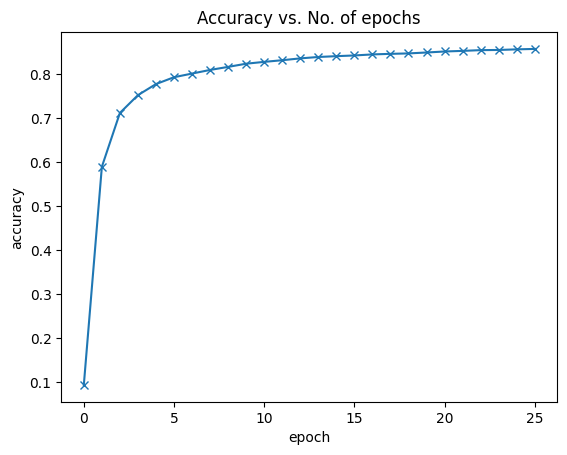

In [ ]:
history = [result0] + history1 + history2 + history3 + history4 + history5
accuracies = [result['val_acc'] for result in history]
plt.plot(accuracies, '-x')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.title('Accuracy vs. No. of epochs')

In [ ]:
#Define test dataset
test_dataset = MNIST(root='data/',
                     train=False,
                     transform=transforms.ToTensor())

Shape: torch.Size([1, 28, 28])
Label: 7


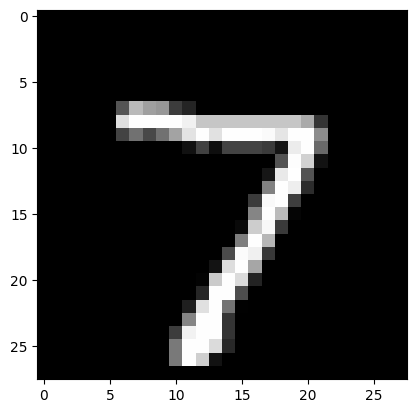

In [ ]:
img, label = test_dataset[0]
plt.imshow(img[0], cmap='gray')
print('Shape:', img.shape)
print('Label:', label)

In [ ]:
img.unsqueeze(0).shape

torch.Size([1, 1, 28, 28])

In [ ]:
def predict_image(img, model):
  xb = img.unsqueeze(0)
  yb = model(xb)
  _, preds = torch.max(yb, dim=1)
  return preds[0].item()


Label: 7 ,Predicted: 7


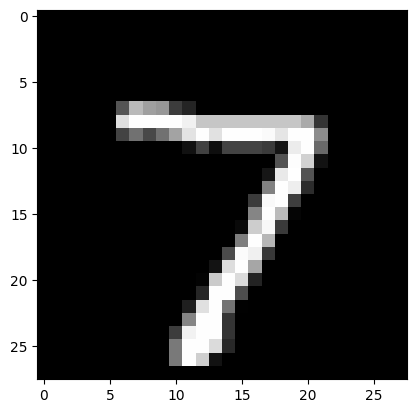

In [ ]:
img, label = test_dataset[0]
plt.imshow(img[0], cmap= 'gray')
print('Label:', label, ',Predicted:', predict_image(img, model))

Label: 6 ,Predicted: 6


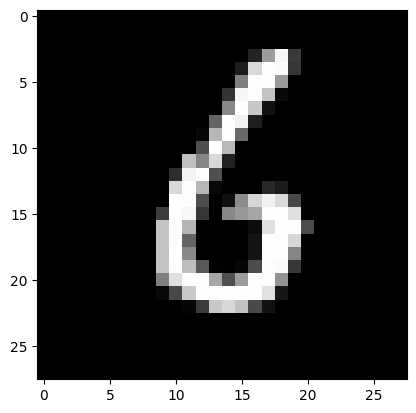

In [ ]:
img, label = test_dataset[50]
plt.imshow(img[0], cmap= 'gray')
print('Label:', label, ',Predicted:', predict_image(img, model))

Label: 9 ,Predicted: 9


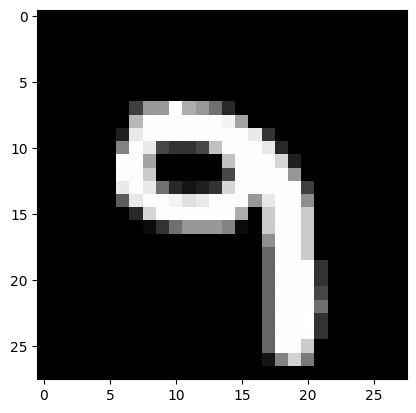

In [ ]:
img, label = test_dataset[212]
plt.imshow(img[0], cmap= 'gray')
print('Label:', label, ',Predicted:', predict_image(img, model))

Label: 9 ,Predicted: 9


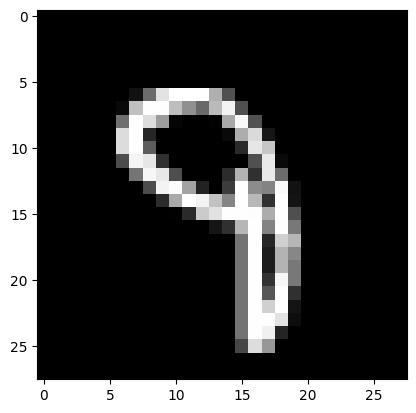

In [ ]:
img, label = test_dataset[193]
plt.imshow(img[0], cmap= 'gray')
print('Label:', label, ',Predicted:', predict_image(img, model))

Label: 2 ,Predicted: 8


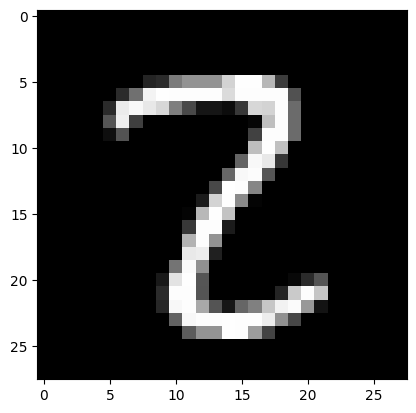

In [ ]:
img, label = test_dataset[1839]
plt.imshow(img[0], cmap= 'gray')
print('Label:', label, ',Predicted:', predict_image(img, model))

In [ ]:
test_loader = DataLoader(test_dataset, batch_size=256)
result = evaluate(model, test_loader)
result

{'val_loss': 0.5867652297019958, 'val_acc': 0.8677734136581421}

In [ ]:
torch.save(model.state_dict(), 'mnist-logistic.pth')

In [ ]:
model.state_dict()

OrderedDict([('linear.weight',
              tensor([[ 0.0041,  0.0141,  0.0003,  ...,  0.0103,  0.0204,  0.0133],
                      [-0.0124, -0.0326,  0.0048,  ..., -0.0273,  0.0118,  0.0315],
                      [ 0.0139, -0.0098,  0.0071,  ..., -0.0055,  0.0005,  0.0113],
                      ...,
                      [ 0.0203,  0.0024,  0.0285,  ..., -0.0090, -0.0241,  0.0269],
                      [-0.0335,  0.0135, -0.0354,  ..., -0.0101,  0.0173,  0.0354],
                      [ 0.0185,  0.0215,  0.0080,  ...,  0.0010, -0.0188, -0.0089]])),
             ('linear.bias',
              tensor([-0.0219,  0.0973,  0.0072, -0.0547,  0.0143,  0.0695,  0.0213,  0.0592,
                      -0.1289, -0.0059]))])

In [ ]:
model2 = MnistModel()

In [ ]:
model2.state_dict()

OrderedDict([('linear.weight',
              tensor([[ 0.0100,  0.0285, -0.0158,  ..., -0.0115,  0.0006, -0.0028],
                      [ 0.0197, -0.0196,  0.0097,  ..., -0.0224, -0.0008,  0.0312],
                      [-0.0237,  0.0236, -0.0328,  ...,  0.0058, -0.0089, -0.0011],
                      ...,
                      [-0.0239,  0.0251, -0.0132,  ...,  0.0030,  0.0106,  0.0037],
                      [-0.0121,  0.0127,  0.0165,  ...,  0.0023, -0.0012,  0.0162],
                      [ 0.0188, -0.0083, -0.0170,  ...,  0.0114, -0.0243,  0.0094]])),
             ('linear.bias',
              tensor([ 0.0019, -0.0214,  0.0265,  0.0338,  0.0204,  0.0091,  0.0325, -0.0174,
                       0.0191,  0.0295]))])

In [ ]:
model2.load_state_dict(torch.load('mnist-logistic.pth'))
model2.state_dict()

OrderedDict([('linear.weight',
              tensor([[ 0.0041,  0.0141,  0.0003,  ...,  0.0103,  0.0204,  0.0133],
                      [-0.0124, -0.0326,  0.0048,  ..., -0.0273,  0.0118,  0.0315],
                      [ 0.0139, -0.0098,  0.0071,  ..., -0.0055,  0.0005,  0.0113],
                      ...,
                      [ 0.0203,  0.0024,  0.0285,  ..., -0.0090, -0.0241,  0.0269],
                      [-0.0335,  0.0135, -0.0354,  ..., -0.0101,  0.0173,  0.0354],
                      [ 0.0185,  0.0215,  0.0080,  ...,  0.0010, -0.0188, -0.0089]])),
             ('linear.bias',
              tensor([-0.0219,  0.0973,  0.0072, -0.0547,  0.0143,  0.0695,  0.0213,  0.0592,
                      -0.1289, -0.0059]))])

In [ ]:
test_loader = DataLoader(test_dataset, batch_size=256)
result = evaluate(model2, test_loader)
result

{'val_loss': 0.5867652297019958, 'val_acc': 0.8677734136581421}